## **The Spark Foundation**
### **Data Science & Business Analytics Tasks**

### **Task 1**: Student's Score Prediction using Supervised Learning

### **@author**: Youssef Maanaoui 

In [20]:
import pandas as pd
import numpy as np 
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

#### **Load The DATA**

In [21]:
student_data = pd.read_csv('http://bit.ly/w-data')

student_data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


#### **Data Preproccessing**
This section is a mendatory bcs every data needs to be preprocessed so the distribution will be normalized arround the medium or median.

In [22]:
student_data.isnull().sum()

Hours     0
Scores    0
dtype: int64

#### **Exploratory Data Analysis**

In [23]:
# The Exploratory Data Analysis Secton 
student_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


The mean and median are be fairly close together so this dataset has a symmetrical distribution, the mean and the median are close together because the middle value in the data set, when ordered smallest to largest, resembles the balancing point in the data, which occurs at the average.

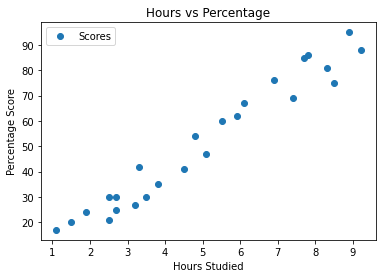

In [24]:
## Scatter plot the data so we can vizualise the relation between the twi variables
student_data.plot(x='Hours', y='Scores', style='o')  

plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

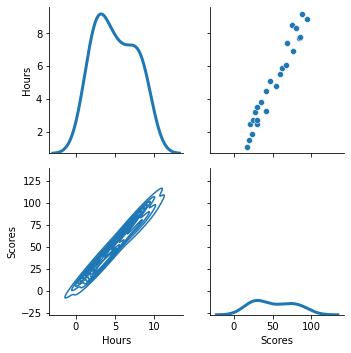

In [25]:
g = sns.PairGrid(student_data)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=3, legend=False)

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of scores so the two variables are **highly correlated**

{'whiskers': [<matplotlib.lines.Line2D at 0x2072ce191c0>,
 'caps': [<matplotlib.lines.Line2D at 0x2072ce19910>,
 'boxes': [<matplotlib.lines.Line2D at 0x2072ce09df0>],
 'medians': [<matplotlib.lines.Line2D at 0x2072ce23070>],
 'fliers': [<matplotlib.lines.Line2D at 0x2072ce23400>],
 'means': []}

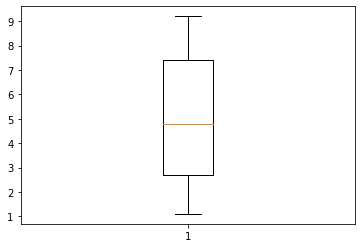

In [26]:
# Box plot 
plt.boxplot(student_data['Hours'])

As we see there is no outliers which is compatible with the result above of desc

<AxesSubplot:xlabel='Scores', ylabel='Count'>

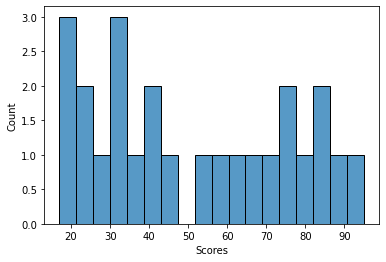

In [27]:
## Frequency of scores
sns.histplot(student_data['Scores'], bins=18)

<AxesSubplot:>

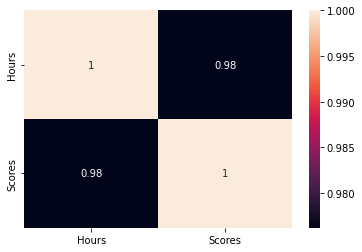

In [28]:
## Correlation matrix 
sns.heatmap(student_data.corr(), annot=True)

#### **Linear Regression Model Building**

In [29]:
model = LinearRegression()

x = student_data.drop('Scores', axis=1).values
y = student_data['Scores'].values

In [30]:
## Split the data 
X_train,X_test,Y_train,Y_test = train_test_split(x, y, test_size=0.3, random_state=0)

# Fit and train The model 
model.fit(X_train, Y_train)
print('Training Phase Has been Successfully Completed!')

Training Phase Has been Successfully Completed!


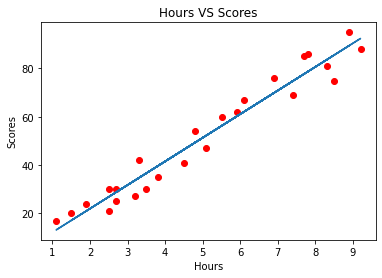

In [31]:
# Plotting the regression line
line = model.coef_*x+model.intercept_

# Plotting for the test data
plt.scatter(x, y, color='red')
plt.plot(x, line)
plt.title('Hours VS Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

Here we can say that the data are normally distributed arround the regression line so our model perform well

In [32]:
# Predictions 
pred = model.predict(X_test)
pred

array([17.05366541, 33.69422878, 74.80620886, 26.8422321 , 60.12335883,
       39.56736879, 20.96909209, 78.72163554])

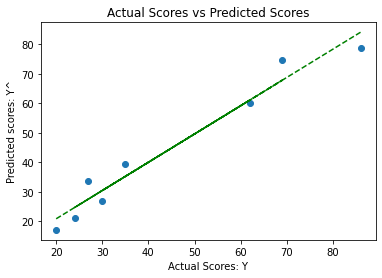

In [33]:
# Predicted Values VS True Values For the test data 
x=Y_test
y=pred
plt.scatter(x, y)
plt.xlabel("Actual Scores: Y")
plt.ylabel("Predicted scores: Y^")
plt.title("Actual Scores vs Predicted Scores")
# Plotting the Best fit line

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"g--")
plt.show()

#### **Model Evaluation**

In [34]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': Y_test, 'Predicted': pred, 'Residuals': pred-Y_test})  
df 

,Actual,Predicted,Residuals
0,20,17.053665,-2.946335
1,27,33.694229,6.694229
2,69,74.806209,5.806209
3,30,26.842232,-3.157768
4,62,60.123359,-1.876641
5,35,39.567369,4.567369
6,24,20.969092,-3.030908
7,86,78.721636,-7.278364


In [35]:
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(Y_test, pred)) 

Mean Absolute Error: 4.4197278080276545


#### **What is the predicted score for a student who studied for 9.25hr/day?** 

In [36]:
nb_hours = np.array(9.25).reshape(-1,1)
Score = model.predict(nb_hours)
print('The predicted score for a student who studied for 9.25h/day is: ', Score[0])

The predicted score for a student who studied for 9.25h/day is:  92.91505723477056
